<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:ylabel='Density'>

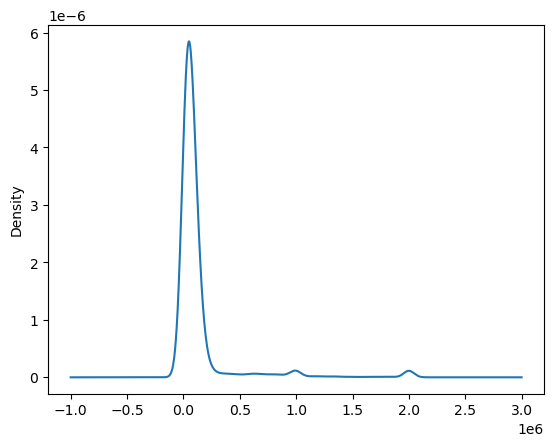

In [13]:
# your code goes here
df['ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

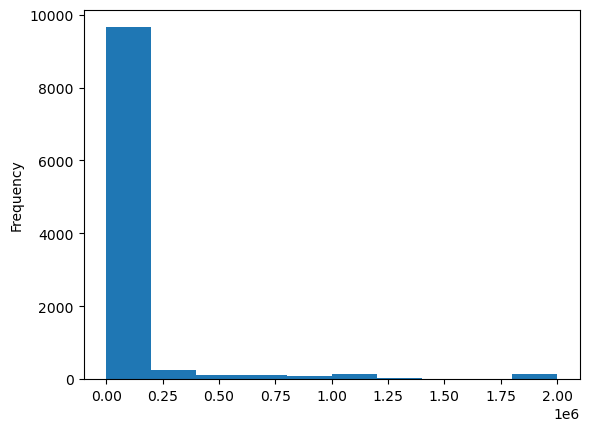

In [5]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [16]:
# your code goes here
# df.Gender.unique() - to check for similar category names
df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [23]:
# your code goes here
#df['Gender'].value_counts()['Woman'] - 731 women
#df['ConvertedComp'].median() = 57745.0 for all respondants
df[df['Gender'] == 'Woman']['ConvertedComp'].median()
#Not sure why 'Gender' had to be bracketed individually.

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


D:\PROGRAMMING\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

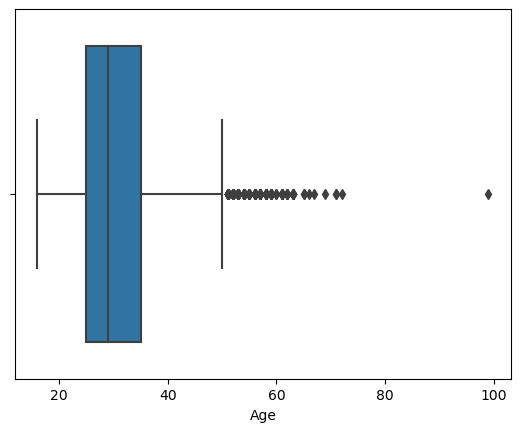

In [87]:
# your code goes here
#df['Age'].describe() #returns 8 values
#    min = 16, q1 = 25,  median = 29,  q3 = 35,  max = 99 (outlier)
import seaborn as sns
sns.boxplot(df.Age)

Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

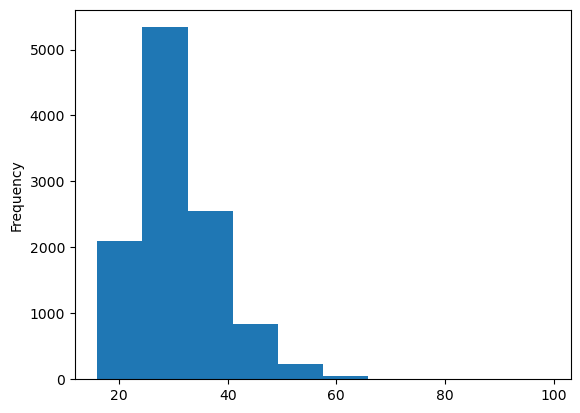

In [37]:
# your code goes here
df['Age'].plot(kind='hist')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


D:\PROGRAMMING\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ConvertedComp'>

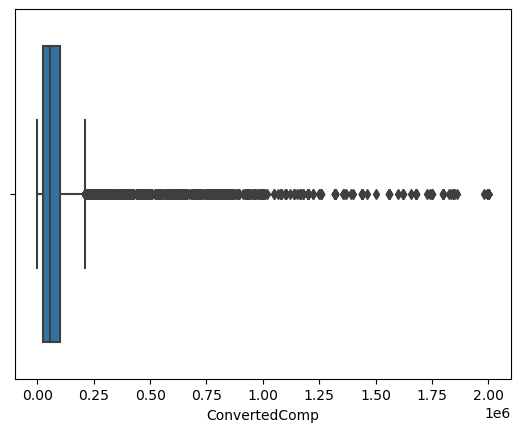

In [43]:
# your code goes here
import seaborn as sns
sns.boxplot(df.ConvertedComp)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [48]:
# your code goes here
#df['ConvertedComp'].describe()  # Q3 = 100000, Q1 = 26868.  IQR = (Q3 - Q1) = 73132
#import numpy as np
#Q1 = df['ConvertedComp'].quantile(0.25)
#Q3 = df['ConvertedComp'].quantile(0.75)
Q1, Q3 = df['ConvertedComp'].quantile([0.25, 0.75])
IQR = Q3 - Q1
IQR



73132.0

Find out the upper and lower bounds.


In [57]:
# your code goes here
#df['ConvertedComp'].describe()
# ConvertedComp median = $57745
lb = Q1 - (1.5*IQR)
ub = Q3 + (1.5*IQR)
print('lower bounds: '+ str(lb))  #Would this equal $0 in reality?
print('upper bounds: '+ str(ub))

lower bounds: -82830.0
upper bounds: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [77]:
# your code goes here
#OutsideUp = (df['ConvertedComp'].count > ('ub'))
#OutsideLow = (df['ConvertedComp'].count < ('lb'))
#Outliers = OutsideUp + OutsideLow
#Outliers
Outliers = df[(df['ConvertedComp'] > ub) | (df['ConvertedComp'] < lb)].sum    #879 Outliers. would like it without the extra data.
print(Outliers)

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Respondent                                         MainBranch Hobbyist  \
3              16                     I am a developer by profession      Yes   
13             32                     I am a developer by profession       No   
45            100                     I am a developer by profession      Yes   
46            102                     I am a developer by profession       No   
60            128  I am not primarily a developer, but I write co...      Yes   
...           ...                                                ...      ...   
11296       24915                     I am a developer by profession      Yes   
11303       24931                     I am a developer by profession       No   
11350       25036                     I am a developer by profession      Yes   
11353       25047                     I am a developer by profession      Yes   
11369       25086                     I am a de

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [79]:
# your code goes here
MinusOutliers =  df[df.ConvertedComp <= ub]
MinusOutliers.ConvertedComp.describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [86]:
# your code goes here
df.corrwith(df['Age'])

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
